In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from IPython.display import IFrame
from PIL import Image
import itertools
import activatie_functies
from netwerk import Netwerk
from sklearn.datasets import load_iris, load_digits

## P1.1, 1.3, 1.4: opzet netwerk

Voor het netwerk heb ik gekozen om in plaats van elke neuron een object te maken, gewoon alle weights en biases in matrices en vectoren te zetten, respectievelijk. Een netwerk evalueren aan de hand van een input vector werkt als volgt:

$${(1) \quad g(x):= f^{L}(W^{L}f^{L-1}(W^{L-1}\cdots f^{1}(x \cdot W^{1}+b^{1})\cdots )+b^{L-1})+b^{L})}$$
waarbij:
 - $x:$ input vector
 - $L:$ aantal layers
 - $W^{l}=(w_{jk}^{l}):$ matrix van weights tussen layer $l$ en $l-1$, waarbij $w_{jk}^{l}$ de weight tussen node $j$ in layer $l$ en node $k$ in layer $l-1$ 
 - $b^{l}:$ bias vector van layer $l$
 - $f^{l}(x):$ activatiefunctie van layer $l$ (in ons model overal hetzelfde)
 
dit kunnen wij versimpelen door de bias vector aan het respectievelijke weight matrix te plakken en een 1 aan de input; een  bias is immers gewoon een weight die altijd geactiveerd wordt.
het netwerk wordt dus geëvalueert dmv:

$${(2) \quad h(x):= f^{L}((W^{L}|b^{L})f^{L-1}((W^{L-1}|b^{L-1})\cdots f^{1}((x|1)(W^{1}|b^{1}))\cdots )))}$$
 
 - $|$ is voor de matrix niet een gewone concatenatie; de bias vector wordt er als het ware onder geplakt.
 
toelichting: de activatie van een Neuron kan worden samengevat als de activatiefunctie over de som van de inputs vermenigvuldigd met de bijhorende weights. Dit laatste deel kan worden gerepresenteerd door de volgende vector multiplicatie (voorbeeld één neuron met twee inputs):

$$ (3) \quad \begin{bmatrix}
x_1 & x_2 & 1 
\end{bmatrix}  \cdot
\begin{bmatrix}
w_1 \\
w_2 \\
b 
\end{bmatrix} = [x_1 \cdot w_1 + x_2 \cdot w_2 + 1 \cdot b]  $$

deze notatie blijkt zich erg goed te lenen voor een netwerk, gezien we nu een volledige laag als volgt kunnen representeren (voorbeeld een layer met drie van zulke neurons):

$$ (4) \quad \begin{bmatrix}
x_a & x_b & 1 
\end{bmatrix}  \cdot
\begin{bmatrix}
w_{a,c} & w_{a,d} & w_{a,e} \\
w_{b,c} & w_{b,d} & w_{b,e} \\
b_c & b_d & b_e 
\end{bmatrix}  = 
\begin{bmatrix} x_a \cdot w_{a,c} + x_b \cdot w_{b,c} + b_c & 
x_a \cdot w_{a,d} + x_b \cdot w_{b,d} + b_d  &
x_a \cdot w_{a,e} + x_b \cdot w_{b,e} + b_e \end{bmatrix} $$

$ x_a $ en $  x_b $ zijn de input a en b, $w_{x,y}$ is de weight tussen neuron x en y, en $b_x$ is de bias van layer x. Het moet nu duidelijk zijn dat als we de activatiefunctie van elk element van de resulterende vector hebben, we een vector hebben met de activaties van deze layer; dit is het stukje $f^{1}((x|1)(W^{1}|b^{1}))$ uit $(2)$. Deze vector met activaties kunnen we nu doorvoeren door het netwerk door het herhaaldelijk te vermenigvuldigen met de weights om uiteindelijk de het resultaat te krijgen.

## P1.2: perceptron test

een perceptron is praktisch gewoon een netwerk met maar een layer met een enkele neuron met de `step` als activatiefunctie.
enkele gates als voorbeeld voor de functionaliteit van de perceptron hieronder:

In [2]:
#tabellen aanmaken voor tests
table_in_2 = np.array(list(itertools.product([0, 1], repeat=1)))

table_in_4   = np.array(list(itertools.product([0, 1], repeat=2)))

table_in_8   = np.array(list(itertools.product([0, 1], repeat=3)))

table_in_4

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
netw = Netwerk(0, 0, 0, 0, activatie_functies.STEP)

netw._weights = [np.array([[ 1],
                           [ 1],
                           [-2]])]
print("truth table AND")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
netw._weights = [np.array([[ 1],
                           [ 1],
                           [-1]])]
print("\ntruth table OR")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
netw._weights = [np.array([[-1],
                           [ 0]])]
print("\ntruth table NOT")
for x in table_in_2:
    print(str(x) + " -> " + str(netw.evaluate(x)))

netw._weights = [np.array([[-1],
                           [-1],
                           [-1],
                           [0]])]
print("\ntruth table NOR w/ 3 in")
for x in table_in_8:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
netw._weights = [np.array([[ 1],
                           [ 1],
                           [ 1],
                           [-1]])]
print("\ntruth table NAND w/ 3 in")
for x in table_in_8:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
g = netw.visualise_network(mindiam=.5, minlen=3, titel='NAND-gate perceptron', filename='NAND')
g.render(directory='graphviz_renders', view=False)
im = Image.open('./graphviz_renders/NAND.gv.bmp')
IFrame('./graphviz_renders/NAND.gv.bmp', width=im.size[0], height=im.size[1])

truth table AND
[0 0] -> [[0]]
[0 1] -> [[0]]
[1 0] -> [[0]]
[1 1] -> [[1]]

truth table OR
[0 0] -> [[0]]
[0 1] -> [[1]]
[1 0] -> [[1]]
[1 1] -> [[1]]

truth table NOT
[0] -> [[1]]
[1] -> [[0]]

truth table NOR w/ 3 in
[0 0 0] -> [[1]]
[0 0 1] -> [[0]]
[0 1 0] -> [[0]]
[0 1 1] -> [[0]]
[1 0 0] -> [[0]]
[1 0 1] -> [[0]]
[1 1 0] -> [[0]]
[1 1 1] -> [[0]]

truth table NAND w/ 3 in
[0 0 0] -> [[0]]
[0 0 1] -> [[1]]
[0 1 0] -> [[1]]
[0 1 1] -> [[1]]
[1 0 0] -> [[1]]
[1 0 1] -> [[1]]
[1 1 0] -> [[1]]
[1 1 1] -> [[1]]


## P1.5: netwerk test

Om het perceptron netwerk te demonstreren hieronder een netwerk met de functionaliteit van een half-adder:

In [4]:
#`weights` en `biases` is private dus dit mag eigenlijk niet, maar je zou in het echt toch nooit 
#zelf de weights en biases zetten

netw = Netwerk(0, 0, 0, 0, activatie_functies.STEP)
netw._weights = [np.array([[ 1, 1,-1],
                           [ 1, 1,-1],
                           [-2,-1, 1]]),
                 np.array([[ 1, 0],
                           [ 0, 1],
                           [ 0, 1],
                           [-1,-2]])]

print("truth table XOR") #een XOR is eigenlijk gewoon het sum gedeelte van een half-adder, dus alleen dat gedeelte van
                         #de output van de half-adder nemen resulteert in de truth table van een XOR
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)[0][1]))

print("\ntruth table half-adder: ")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
g = netw.visualise_network(mindiam=1.2, minlen=4, titel='Half-adder perceptron netwerk', filename='HalfAdder')
g.render(directory='graphviz_renders', view=False)
im = Image.open('./graphviz_renders/HalfAdder.gv.bmp')
IFrame('./graphviz_renders/HalfAdder.gv.bmp', width=im.size[0], height=im.size[1])

truth table XOR
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0

truth table half-adder: 
[0 0] -> [[0 0]]
[0 1] -> [[0 1]]
[1 0] -> [[0 1]]
[1 1] -> [[1 0]]


## P2: Perceptron learning rule

Voor deze opdracht heb ik de functie `update_trivial` gemaakt, die één enkele layer updated aan de hand van 
$Δw_j := η (target^{(i)} – output^{(i)}) x_j^{(i)}$
Wat in onze enkele layer dus neerkomt op*:
$$ (5) \quad W_1 = W_0 + η (target^{(i)} – f(W_0in^{(i)}))⊗_{outer}in^{(i)}$$ 
waarbij:
 - $W_n:$ matrix van weights (incl. biases) na update n 
 - $η:$ learning rate
 - $target^{(i)}:$ target feature i 
 - $in^{(i)}:$ input feature i (incl. 1 voor bias)
 - $f(x):$ activatiefunctie
 
toelichting:
zoals uitgelegd bij P1, $f(W_0in^{(i)})$ is de vector met activaties van de neuron laag. Als dit van de target af trekken krijgen we een vector met errors van deze laag. We weten dat $Δw_{x,y}$ gelijk is aan de error van neuron y vermenigvuldigd met de 'bijdrage' van de weight van x naar y aan de error -- dus de input-laag. We kunnen nu dus een matrix van $Δw$ opstellen waaruit zal blijken dat dit resulteerd uit een simpele vectormultiplicatie van de input vector en de error vector (voorbeeld een outputlaag met drie neurons):

$$ (6) \quad \begin{bmatrix}
Δw_{a,c} & Δw_{a,d} & Δw_{a,e} \\
Δw_{b,c} & Δw_{b,d} & Δw_{b,e} \\
Δb_c & Δb_d & Δb_e 
\end{bmatrix} = 
η\begin{bmatrix}
err_c \cdot x_a & err_d \cdot x_a & err_e \cdot x_a \\
err_c \cdot x_b & err_d \cdot x_b & err_e \cdot x_b \\
err_c \cdot 1 & err_d \cdot 1 & err_e \cdot 1
\end{bmatrix} = 
η\begin{bmatrix}
err_c \\
err_d \\
err_e 
\end{bmatrix} ⊗
\begin{bmatrix}
x_a \\
x_b \\
1 
\end{bmatrix} 
$$ 


 
**note: later ben ik erachter gekomen dat dit op hetzelfde neerkomt als $W_0 + η (target^{(i)} – f(W_0in^{(i)}))^T \cdot (in^{(i)}) $, maar ik dacht ik laat het er in want ik had nog nooit van een outer product gehoord*:

$$ (7) \quad \begin{bmatrix}
err_c \\
err_d \\
err_e 
\end{bmatrix} ⊗
\begin{bmatrix}
x_a \\
x_b \\
1 
\end{bmatrix} = 
\begin{bmatrix}
err_c \\
err_d \\
err_e 
\end{bmatrix} \cdot
\begin{bmatrix}
x_a &
x_b &
1 
\end{bmatrix} = E^T \cdot in$$

dit is overigens ook hetzelfde als $in^T \cdot E$, deze notatie komt bij backpropegation terug

## P2.3 a: AND 
hieronder de learning rule gedemonstreerd door een perceptron de AND-gate te leren:

In [5]:
np.random.seed(1819772)
netw = Netwerk(0, 0, 2, 1, activatie_functies.STEP, .8)

d_and = np.array([[0],
                  [0],
                  [0],
                  [1]])

print("\ninitial weights:")
for w in netw._weights:
    print(w)
print("initial MSE:")
print(netw.loss_MSE(table_in_4, d_and))
print()

for i in range(4):
    netw.update_trivial(table_in_4, d_and, True)

g1 = netw.visualise_network(mindiam=.5, minlen=5, filename='learningRule')
g1.render(directory='graphviz_renders', view=False)
im = Image.open('./graphviz_renders/learningRule.gv.bmp')
IFrame('./graphviz_renders/learningRule.gv.bmp', width=im.size[0], height=im.size[1])


initial weights:
[[-1.34322705]
 [ 0.53339359]
 [ 1.04945582]]
initial MSE:
[0.5]

Δ ⊗ in    = 
[[-0.  -0.  -0.8]]
updated W = 
[array([[-1.34322705],
       [ 0.53339359],
       [ 0.24945582]])]
MSE       = [0.75]

Δ ⊗ in    = 
[[-0.  -0.8 -0.8]]
updated W = 
[array([[-1.34322705],
       [-0.26660641],
       [-0.55054418]])]
MSE       = [0.25]

Δ ⊗ in    = 
[[0. 0. 0.]]
updated W = 
[array([[-1.34322705],
       [-0.26660641],
       [-0.55054418]])]
MSE       = [0.25]

Δ ⊗ in    = 
[[0.8 0.8 0.8]]
updated W = 
[array([[-0.54322705],
       [ 0.53339359],
       [ 0.24945582]])]
MSE       = [0.5]

Δ ⊗ in    = 
[[-0.  -0.  -0.8]]
updated W = 
[array([[-0.54322705],
       [ 0.53339359],
       [-0.55054418]])]
MSE       = [0.25]

Δ ⊗ in    = 
[[0. 0. 0.]]
updated W = 
[array([[-0.54322705],
       [ 0.53339359],
       [-0.55054418]])]
MSE       = [0.25]

Δ ⊗ in    = 
[[0. 0. 0.]]
updated W = 
[array([[-0.54322705],
       [ 0.53339359],
       [-0.55054418]])]
MSE       = [0.25]



## P2.3 b: XOR
een enkele perceptron kan nooit een XOR-gate leren

In [6]:
np.random.seed(1819772)
netw = Netwerk(0, 0, 2, 1, activatie_functies.STEP, .8)

d_xor = np.array([[0], 
                  [1], 
                  [1], 
                  [0]])

print("\ninitial weights:")
for w in netw._weights:
    print(w)
print("initial MSE:")
print(netw.loss_MSE(table_in_4, d_xor))
print()

for i in range(10):
    netw.update_trivial(table_in_4, d_xor, True)

g1 = netw.visualise_network(mindiam=.5, minlen=5, filename='learningRule')
g1.render(directory='graphviz_renders', view=False)
im = Image.open('./graphviz_renders/learningRule.gv.bmp')
IFrame('./graphviz_renders/learningRule.gv.bmp', width=im.size[0], height=im.size[1])


initial weights:
[[-1.34322705]
 [ 0.53339359]
 [ 1.04945582]]
initial MSE:
[0.75]

Δ ⊗ in    = 
[[-0.  -0.  -0.8]]
updated W = 
[array([[-1.34322705],
       [ 0.53339359],
       [ 0.24945582]])]
MSE       = [0.5]

Δ ⊗ in    = 
[[0. 0. 0.]]
updated W = 
[array([[-1.34322705],
       [ 0.53339359],
       [ 0.24945582]])]
MSE       = [0.5]

Δ ⊗ in    = 
[[0.8 0.  0.8]]
updated W = 
[array([[-0.54322705],
       [ 0.53339359],
       [ 1.04945582]])]
MSE       = [0.5]

Δ ⊗ in    = 
[[-0.8 -0.8 -0.8]]
updated W = 
[array([[-1.34322705],
       [-0.26660641],
       [ 0.24945582]])]
MSE       = [0.75]

Δ ⊗ in    = 
[[-0.  -0.  -0.8]]
updated W = 
[array([[-1.34322705],
       [-0.26660641],
       [-0.55054418]])]
MSE       = [0.5]

Δ ⊗ in    = 
[[0.  0.8 0.8]]
updated W = 
[array([[-1.34322705],
       [ 0.53339359],
       [ 0.24945582]])]
MSE       = [0.5]

Δ ⊗ in    = 
[[0.8 0.  0.8]]
updated W = 
[array([[-0.54322705],
       [ 0.53339359],
       [ 1.04945582]])]
MSE       = [0.5]

## P2.3 c: Iris

Zoals in de plot hieronder te zien is er een groot verschil tussen *Setosa* (indigo) en *Versicolour* (geel). De twee groepen zijn volledig te onderscheiden met een rechte lijn in elke dimensie, wat het voor ons perceptron netwerk dus makkelijk maakt.

tussen *Versicolour* (geel) en *Verginica* (lochinvar) valt geen recht flak te trekken, en dus zal het ook onmogelijk zijn om een perfecte MSE te behalen.
Het duurt wat langer voor het netwerk getraind is, en komt op zn best rond de 0.03.

In [7]:
iris = load_iris()
X = iris.data
y = np.reshape(iris.target,(-1,1))
data = np.c_[X,y]

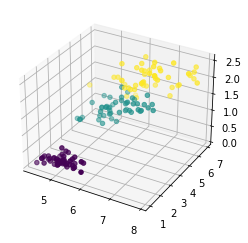

In [8]:
x = data.T[0]
y = data.T[2] #dimensie 1 komt voor elke soort het meest overeen, en we kunnen maar 3 dimensies plotten, dus die is weggelaten
z = data.T[3] 
c = data.T[4]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=c)
plt.show()


In [9]:
np.random.seed(1819772)
netw = Netwerk(0, 0, 4, 1, activatie_functies.STEP, .1)

iris = load_iris()
X = iris.data[:100]
y = np.reshape(iris.target[:100],(-1,1))

for i in range(5):
    netw.update_trivial(X, y, False)
    print("weights: " + str(netw._weights))
    print("loss:    " + str(netw.loss_MSE(X, y)))

weights: [array([[-0.64322705],
       [ 0.85339359],
       [ 1.51945582],
       [ 1.16135062],
       [-1.25814302]])]
loss:    [0.5]
weights: [array([[-0.66322705],
       [ 0.74339359],
       [ 1.70945582],
       [ 1.24135062],
       [-1.25814302]])]
loss:    [0.5]
weights: [array([[-0.57322705],
       [ 0.61339359],
       [ 1.96945582],
       [ 1.32135062],
       [-1.25814302]])]
loss:    [0.5]
weights: [array([[-1.08322705],
       [ 0.26339359],
       [ 1.82945582],
       [ 1.30135062],
       [-1.35814302]])]
loss:    [0.]
weights: [array([[-1.08322705],
       [ 0.26339359],
       [ 1.82945582],
       [ 1.30135062],
       [-1.35814302]])]
loss:    [0.]


In [10]:
np.random.seed(0)
netw = Netwerk(0, 0, 4, 1, activatie_functies.STEP, .1)

X = iris.data[50:]
y = np.reshape(iris.target[:100],(-1,1))

for i in range(500):
    netw.update_trivial(X, y, False)
    
print("weights: " + str(netw._weights))
print("loss:    " + str(netw.loss_MSE(X, y)))

weights: [array([[-9.32594765],
       [-8.80984279],
       [12.38873798],
       [18.9108932 ],
       [-6.93244201]])]
loss:    [0.04]


## P3.2: Neuron Unit

Een neuron is gewoon een perceptron maar dan met een andere activatiefunctie (in ons geval de sigmoid) dan de step. we hoeven dus ook niet vrij veel te veranderen om een neuron te krijgen.

zoals hieronder te zien werkt de neuron niet met dezelfde weights als de perceptron, als de uitkomst wordt afgerond zit het er echter wel in de buurt. de Sigmoid komt immers niet exact 0 of 1 uit, maar iets daar tussenin.

In [11]:
netw = Netwerk(0, 0, 0, 0, activatie_functies.SIGMOID)

netw._weights = [np.array([[ 1],
                           [ 1],
                           [-2]])]
print("truth table AND")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
netw._weights = [np.array([[ 1],
                           [ 1],
                           [-1]])]
print("\ntruth table OR")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
netw._weights = [np.array([[-1],
                           [ 0]])]
print("\ntruth table NOT")
for x in table_in_2:
    print(str(x) + " -> " + str(netw.evaluate(x)))

truth table AND
[0 0] -> [[0.11920292]]
[0 1] -> [[0.26894142]]
[1 0] -> [[0.26894142]]
[1 1] -> [[0.5]]

truth table OR
[0 0] -> [[0.26894142]]
[0 1] -> [[0.5]]
[1 0] -> [[0.5]]
[1 1] -> [[0.73105858]]

truth table NOT
[0] -> [[0.5]]
[1] -> [[0.26894142]]


als we de weights zodanig veranderen dat de uitkomst helemaal links of rechts van de sigmoid zit wordt de uitkomst al correcter. ik heb hier voor meervouden van 6 gekozen, gezien σ(6) = 0.99, wat close enough by de 1 zit voor deze doeleinden.

In [12]:
netw = Netwerk(0, 0, 0, 0, activatie_functies.SIGMOID)

netw._weights = [np.array([[ 12],
                           [ 12],
                           [-18]])]
print("truth table AND")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x).round(3)))
    
netw._weights = [np.array([[ 12],
                           [ 12],
                           [ -6]])]
print("\ntruth table OR")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x).round(3)))
    
netw._weights = [np.array([[-12],
                           [  6]])]
print("\ntruth table NOT")
for x in table_in_2:
    print(str(x) + " -> " + str(netw.evaluate(x).round(3)))
    


truth table AND
[0 0] -> [[0.]]
[0 1] -> [[0.002]]
[1 0] -> [[0.002]]
[1 1] -> [[0.998]]

truth table OR
[0 0] -> [[0.002]]
[0 1] -> [[0.998]]
[1 0] -> [[0.998]]
[1 1] -> [[1.]]

truth table NOT
[0] -> [[0.998]]
[1] -> [[0.002]]


In [13]:
netw._weights = [np.array([[-12],
                           [-12],
                           [-12],
                           [  6]])]

print("\ntruth table NOR w/ 3 in")
for x in table_in_8:
    print(str(x) + " -> " + str(netw.evaluate(x).round(3)))
    
g = netw.visualise_network(mindiam=.5, minlen=3, titel='NOR-gate neuron', filename='NOR')
g.render(directory='graphviz_renders', view=False)
im = Image.open('./graphviz_renders/NOR.gv.bmp')
IFrame('./graphviz_renders/NOR.gv.bmp', width=im.size[0], height=im.size[1])


truth table NOR w/ 3 in
[0 0 0] -> [[0.998]]
[0 0 1] -> [[0.002]]
[0 1 0] -> [[0.002]]
[0 1 1] -> [[0.]]
[1 0 0] -> [[0.002]]
[1 0 1] -> [[0.]]
[1 1 0] -> [[0.]]
[1 1 1] -> [[0.]]


In [14]:
netw = Netwerk(0, 0, 0, 0, activatie_functies.SIGMOID)
netw._weights = [np.array([[ 12, 12,-12],
                           [ 12, 12,-12],
                           [-18, -6, 18]]),
                 np.array([[ 12,  0],
                           [  0, 12],
                           [  0, 12],
                           [ -6,-18]])]

print("\ntruth table half-adder: ")
for x in table_in_4:
    print(str(x) + " -> " + str(netw.evaluate(x)))
    
g = netw.visualise_network(mindiam=1.2, minlen=4, titel='Half-adder neuraal netwerk', filename='HalfAdder')
g.render(directory='graphviz_renders', view=False)
im = Image.open('./graphviz_renders/HalfAdder.gv.bmp')
IFrame('./graphviz_renders/HalfAdder.gv.bmp', width=im.size[0], height=im.size[1])


truth table half-adder: 
[0 0] -> [[0.00247262 0.0025469 ]]
[0 1] -> [[0.0025469 0.9973766]]
[1 0] -> [[0.0025469 0.9973766]]
[1 1] -> [[0.9974531 0.0025469]]


## P4 - Backpropagation

backpropagation is het berekenen van de gradienten voor elke laag door de afgeleide van de loss van rechts naar links door het netwerk heen te voeren.

de error van de output-layer wordt gegeven door het Hadamard product tussend de afgeleide van de activatiefunctie te vermenigvuldigen met de afgeleide van de cost-functie:

$$(8) \quad \delta ^{L}:=f'(z^{L})\circ C'(a^{L}, y)$$
waarbij:
 - $\delta ^{l}:$ error layer $l$ 
 - $f(x):$ activatiefunctie
 - $z^{l}:$ input layer $l$ 
 - $C(x, y):$ costfunctie
 - $a^{l}:$ activatie layer $l$ 
 - $y:$ target vector
 - $L:$ totaal aantal layers
 
wat bijvoorbeeld met een sigmoid activatiefunctie en een de squared error als costfunctie er dus zo uit ziet als $\delta ^{L}= σ(z^{L}) \circ 1 – σ(z^{L}) \circ 2(a^{L} - y)$. de factor 2 voor $C'$ wordt in ons model voor simplificatie weggelaten.

toelichting:
de afgeleide van een functie geeft ons de richtingscoëfficient van de functie op dat punt, als het dus nul is hebben we een lokaal minimum gevonden -- de helling is daar 0. Om onze error te bepalen willen we dus in plaats van gewoon de activatiefunctie van de input ($z$), de afgeleide van de activatiefunctie nemen en de cost functie nemen. Als we een lokaal minimum gevonden hebben zou de error immers 0 moeten zijn.
    
vervolgens kan deze error van recursief door het netwerk gepropageerd worden door:

$$(9) \quad \delta ^{l-1}:=f'(z^{l-1})\circ  (\delta ^{l} \cdot (W^{l})^{T})$$

toelichting:
de vergelijking voor backpropegation voor een enkele neuron die op canvas staat ($\delta_i = σ'(input_i) \cdot Σ_j w_{i,j} \cdot \delta_j$) kan in vectoren worden uitgedrukt als volgt (voorbeeld laag l en k met beide 3 neurons;  getransposed voor leesbaarheid):

$$ (10) \quad σ'\begin{bmatrix}  
z_{l1}\\z_{l2}\\z_{l3}
\end{bmatrix}^T \circ
\begin{bmatrix}  
\delta_{k1} \cdot w_{l1,k1} + \delta_{k2} \cdot w_{l1,k2} + \delta_{k3} \cdot w_{l1,k3}\\
\delta_{k1} \cdot w_{l2,k1} + \delta_{k2} \cdot w_{l2,k2} + \delta_{k3} \cdot w_{l2,k3}\\
\delta_{k1} \cdot w_{l3,k1} + \delta_{k2} \cdot w_{l3,k2} + \delta_{k3} \cdot w_{l3,k3}
\end{bmatrix}^T$$

de rechter vector in $(10)$ valt uit te drukken als de vector-matrix multiplicatie:
$$ (11) \quad \begin{bmatrix} 
\delta_{k1} & \delta_{k2} & \delta_{k3}
\end{bmatrix} \cdot
\begin{bmatrix} 
w_{l1,k1} & w_{l2,k1} & w_{l3,k1}\\
w_{l1,k2} & w_{l2,k2} & w_{l3,k2}\\
w_{l1,k3} & w_{l2,k3} & w_{l3,k3}  
\end{bmatrix}$$

het matrix wat hier rechts is uitgeschreven blijkt hetzelfde te zijn als de transpose van $(4)$. Als we $(4)$, $(10)$ en $(11)$ dus samen nemen krijgen we:

$$ (12) \quad σ'\begin{bmatrix}  
z_{l1}&z_{l2}&z_{l3}
\end{bmatrix} \circ 
\begin{bmatrix} 
\delta_{k1} & \delta_{k2} & \delta_{k3}
\end{bmatrix} \cdot 
\begin{bmatrix} 
w_{l1,k1} & w_{l1,k2} & w_{l1,k3}\\
w_{l2,k1} & w_{l2,k2} & w_{l2,k3}\\
w_{l3,k1} & w_{l3,k2} & w_{l3,k3}  
\end{bmatrix}^T = (9)
$$
 
tot slot wordt de gradient van elke laag berekend door deze errors met de respectievelijke activatie te vermenigvuldigen (dit stuk is vrijwel hetzelfde als P3, zie $(6)$ en $(7)$ voor extra toelichting):
$$ (13) \quad \nabla_{W^l}C:= (a^{l-1})^{T} \cdot \delta ^{l}$$

de nieuwe weights zijn dan gegeven door:
$$ (14) \quad W^{l}_{n+1} = W^l_{n} - η \cdot \nabla_{W^l}C$$

waarbij:
 - $\nabla_{W^l}C:$ gradient layer $C$
 - $W^l_{n}:$ weights van layer $l$, update $n$
 - $η:$ learning rate
 

### P4.15: AND-poort

In [15]:
np.random.seed(1)
netw = Netwerk(0, 0, 2, 1, activatie_functies.SIGMOID(), 1)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

target = np.array([[0],
                   [0],
                   [0],
                   [1]])

for i in range(1000):
    netw.update_backprop(X, target)
    
print("out: ")
print(netw.evaluate(X).round(3))
print("\nMSE: ")
print(netw.loss_MSE(X, target))

out: 
[[0.   ]
 [0.055]
 [0.055]
 [0.935]]

MSE: 
[0.00255932]


### P4.16: XOR-poort

In [16]:
np.random.seed(1)
netw = Netwerk(1, 2, 2, 1, activatie_functies.SIGMOID(), 1)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

target = np.array([[0],
                   [1],
                   [1],
                   [0]])

for i in range(1000):
    netw.update_backprop(X, target)
    
print("out: ")
print(netw.evaluate(X).round(3))
print("\nMSE: ")
print(netw.loss_MSE(X, target))

out: 
[[0.052]
 [0.94 ]
 [0.939]
 [0.079]]

MSE: 
[0.0040687]


### P4.17: Half Adder

In [17]:
np.random.seed(1)
netw = Netwerk(1, 3, 2, 2, activatie_functies.SIGMOID(), 1)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

target = np.array([[0, 0],
                   [0, 1],
                   [0, 1],
                   [1, 0]])

for i in range(1000):
    netw.update_backprop(X, target)
    
print("out: ")
print(netw.evaluate(X).round(3))
print("\nMSE: ")
print(netw.loss_MSE(X, target))

out: 
[[0.014 0.033]
 [0.037 0.948]
 [0.033 0.952]
 [0.951 0.055]]

MSE: 
[0.00126803 0.00229562]


### P4.18: Iris dataset 

In [18]:
np.random.seed(6)
netw = Netwerk(1, 4, 4, 3, activatie_functies.SIGMOID(), .1)

iris = load_iris()
X = iris.data

def tobin(x):
    #hiermee transformeren wij de target zo dat er voor elke bloem een neuron is dus bijv 1 -> [0 1 0]
    res = np.zeros(3)
    res[x] = 1
    return res
target = np.array(list(map(tobin, iris.target)))

for i in range(1000):
    netw.update_backprop(X, target)

print("out: ")
print(netw.evaluate(X).round(3))
print("\nMSE: ")
print(netw.loss_MSE(X, target))


out: 
[[0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.976 0.024 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.976 0.024 0.006]
 [0.976 0.024 0.006]
 [0.975 0.025 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.976 0.024 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.978 0.022 0.006]
 [0.967 0.033 0.005]
 [0.978 0.022 0.006]
 [0.977 0.022 0.006]
 [0.977 0.022 0.006]
 [0.977 0.023 0.006]
 [0.978 0.022 0.006]
 [0.977

### P4.19: Digit dataset

onderaan een aantal van de digits met bijhorende voorspelling. 
1-vormige cijfers lijkt het model het meest moeite mee te hebben

In [19]:
netw = Netwerk(2, 15, 64, 10, activatie_functies.SIGMOID(), 0.1)
digits = load_digits()
data = np.array(digits['data'])

def tobin(x):
    #hetzelfde als bij de bloemen, maar dan voor elke digit
    res = np.zeros(10) 
    res[x] = 1
    return res
target = np.array(list(map(tobin, digits['target'])))

#ongeveer 20% van de dataset apart houden voor validatie
data_train = data[:-360] 
data_test = data[-360:]

target_train = target[:-360]
target_test = target[-360:]

for i in range(100):
    netw.update_backprop(data_train, target_train)

#de accuracy is simpelweg het aantaL correcte voorspellingen gedeeld door het totaal aantal voorspellingen.
#ik heb dit hier gebruikt omdat ik dat representatiever vind voor het functioneren van het model.
acc = (digits['target'][-360:] == list(map(np.argmax, netw.evaluate(data_test)))).astype(int).mean()
print("\naccuracy test set: " + str(acc))
print("MSE test set:\n" + str(netw.loss_MSE(data_test, target_test)))


accuracy test set: 0.8861111111111111
MSE test set:
[0.00310569 0.03759262 0.00320105 0.03117136 0.01378263 0.00356951
 0.00611159 0.01721338 0.03592309 0.02038681]


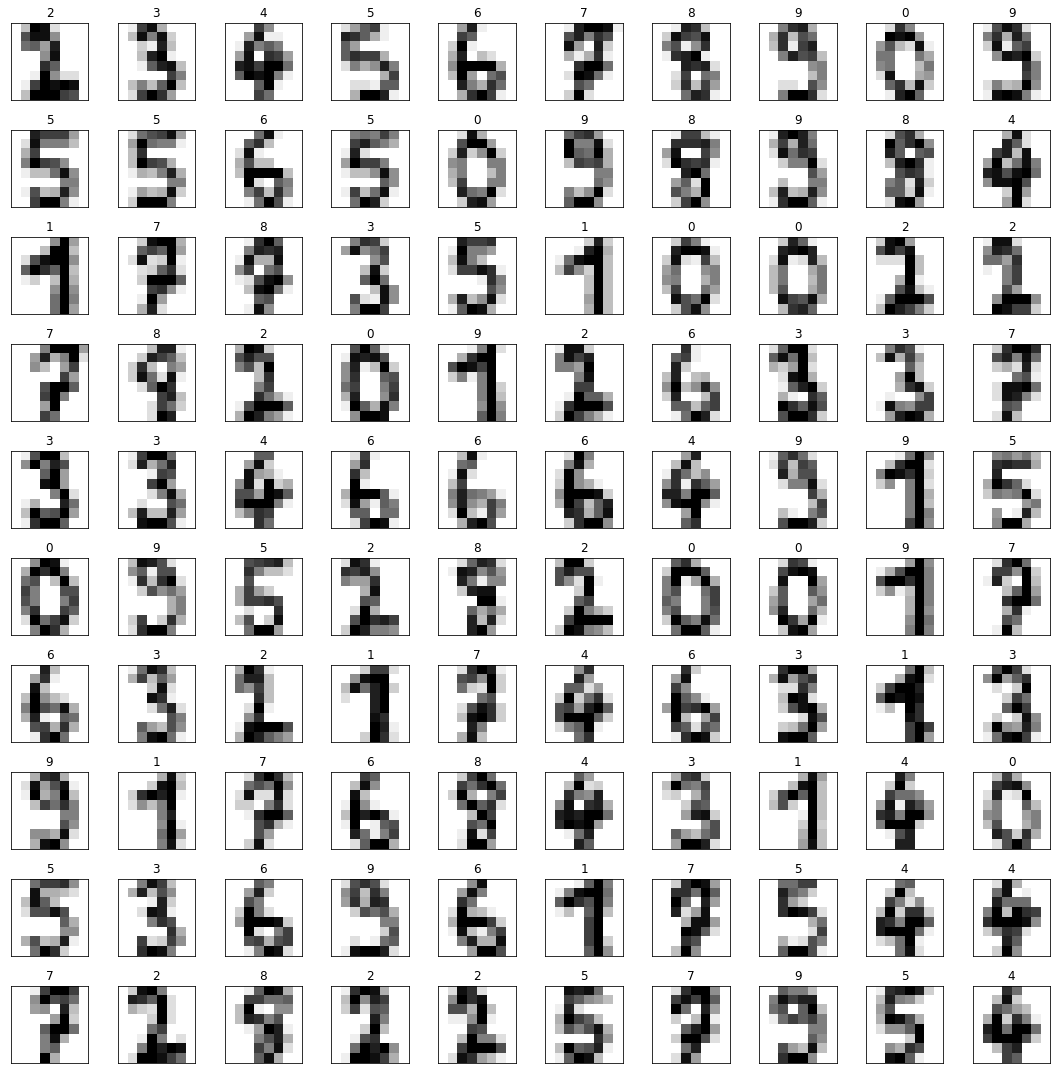

In [20]:
import matplotlib.pyplot as plt

res = list(map(np.argmax, netw.evaluate(data_test[:100])))

plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(digits.images[-360:][i], cmap=plt.cm.gray_r)
    plt.title(str(res[i]))
    plt.xticks(())
    plt.yticks(())
    
plt.tight_layout(pad=1.0)
plt.show()

### Bronnen
 - https://en.wikipedia.org/wiki/Gradient_descent
 - https://en.wikipedia.org/wiki/Backpropagation
 - https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi